In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Position_Salaries.csv')

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [2]:
print(df.isnull().sum())

Position    0
Level       0
Salary      0
dtype: int64


In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
print(X)
print(X_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


$$ŷ=b_0+b_1 X_1$$
`X`는 데이터 셋의 독립 변수에 해당하며, 위 수식에서 $X_1$의 역할을 함

$\hat{y}$는 종속 변수인 Salary에 해당함

$$\hat{y}=b_0+b_1 X_1+b_2 X^2_1$$
`X_poly`는 독립 변수를 $n$ 값만큼 제곱하여 이루어진 행렬에 해당함

단일 특성 행렬을 제곱으로 이루어진 특성 행렬로 변경하기 위해 `PolynomialFeatures` 객체 필요



In [4]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_poly, y)

LinearRegression()

선형 회귀 객체인 `LinearRegression`을 사용하여 제곱 특성 행렬로 이루어진 `X_poly`와 종속 변수 `y`의 상관관계를 학습함

제곱 특성 행렬이 아닌 `X` 변수를 사용하면 당연하게도 1차 함수인 Simple Linear Regression이 나올 수 밖에 없음

[[1.00000000e+00 1.18727273e+05]
 [2.00000000e+00 4.41515152e+04]
 [3.00000000e+00 8.43939394e+03]
 [4.00000000e+00 1.15909091e+04]
 [5.00000000e+00 5.36060606e+04]
 [6.00000000e+00 1.34484848e+05]
 [7.00000000e+00 2.54227273e+05]
 [8.00000000e+00 4.12833333e+05]
 [9.00000000e+00 6.10303030e+05]
 [1.00000000e+01 8.46636364e+05]]


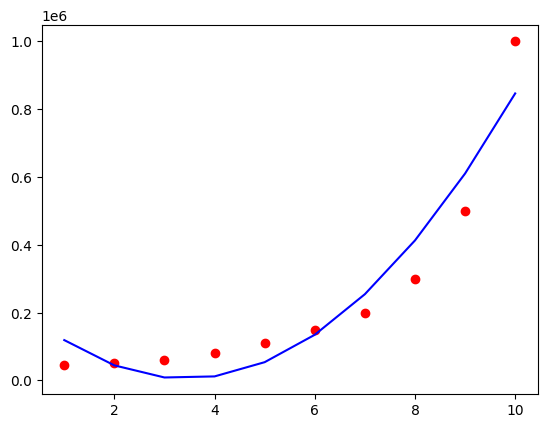

In [9]:
import matplotlib.pyplot as plt

print(np.concatenate((X, regressor.predict(X_poly).reshape(-1, 1)), 1))

plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X_poly), color='blue')


In [12]:
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)
print(X_grid)
print(X)

[[1. ]
 [1.1]
 [1.2]
 [1.3]
 [1.4]
 [1.5]
 [1.6]
 [1.7]
 [1.8]
 [1.9]
 [2. ]
 [2.1]
 [2.2]
 [2.3]
 [2.4]
 [2.5]
 [2.6]
 [2.7]
 [2.8]
 [2.9]
 [3. ]
 [3.1]
 [3.2]
 [3.3]
 [3.4]
 [3.5]
 [3.6]
 [3.7]
 [3.8]
 [3.9]
 [4. ]
 [4.1]
 [4.2]
 [4.3]
 [4.4]
 [4.5]
 [4.6]
 [4.7]
 [4.8]
 [4.9]
 [5. ]
 [5.1]
 [5.2]
 [5.3]
 [5.4]
 [5.5]
 [5.6]
 [5.7]
 [5.8]
 [5.9]
 [6. ]
 [6.1]
 [6.2]
 [6.3]
 [6.4]
 [6.5]
 [6.6]
 [6.7]
 [6.8]
 [6.9]
 [7. ]
 [7.1]
 [7.2]
 [7.3]
 [7.4]
 [7.5]
 [7.6]
 [7.7]
 [7.8]
 [7.9]
 [8. ]
 [8.1]
 [8.2]
 [8.3]
 [8.4]
 [8.5]
 [8.6]
 [8.7]
 [8.8]
 [8.9]
 [9. ]
 [9.1]
 [9.2]
 [9.3]
 [9.4]
 [9.5]
 [9.6]
 [9.7]
 [9.8]
 [9.9]]
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


<ipython-input-12-9af39a55eb2d>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)


독립 변수 Level이 담겨있는 `X` 변수의 간격을 0.1씩 세분화하기 위해 `arange()` 함수를 사용함

`X` 변수의 최솟값부터 최댓값까지 0.1씩 간격을 띄우며 리스트에 저장함

값을 세분화하는 이유는 plot 곡선이 완곡하게끔 만들도록 하기 위함임

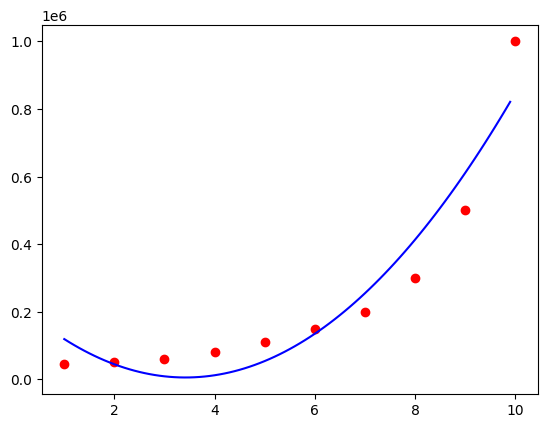

In [10]:
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(poly_reg.fit_transform(X_grid)), color='blue')